(182, 40)


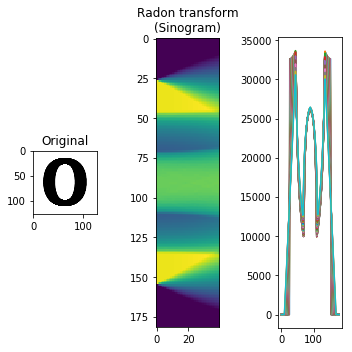

In [12]:
from skimage.io import imread
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.transform import radon, rescale, rotate
import numpy as np
from skimage import feature
from scipy import ndimage as ndi
from matplotlib.mlab import rms_flat
from numpy import argmax

sample = imread('resources/o1.png')
image = rgb2gray(sample)
# image = ndi.gaussian_filter(image, 2)
# image = feature.canny(image)

theta = np.linspace(0., 18., 40, endpoint=False)
sinogram = radon(image, theta=theta, circle=False)
print(sinogram.shape)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(5, 5))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.imshow(sinogram)

ax3.plot(sinogram[1:])

fig.tight_layout()
plt.show()

/Users/muthukrishnan/Library/Python/3.7/lib/python/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: The rms_flat function was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  # This is added back by InteractiveShellApp.init_path()


Rotation: 90.00 degrees


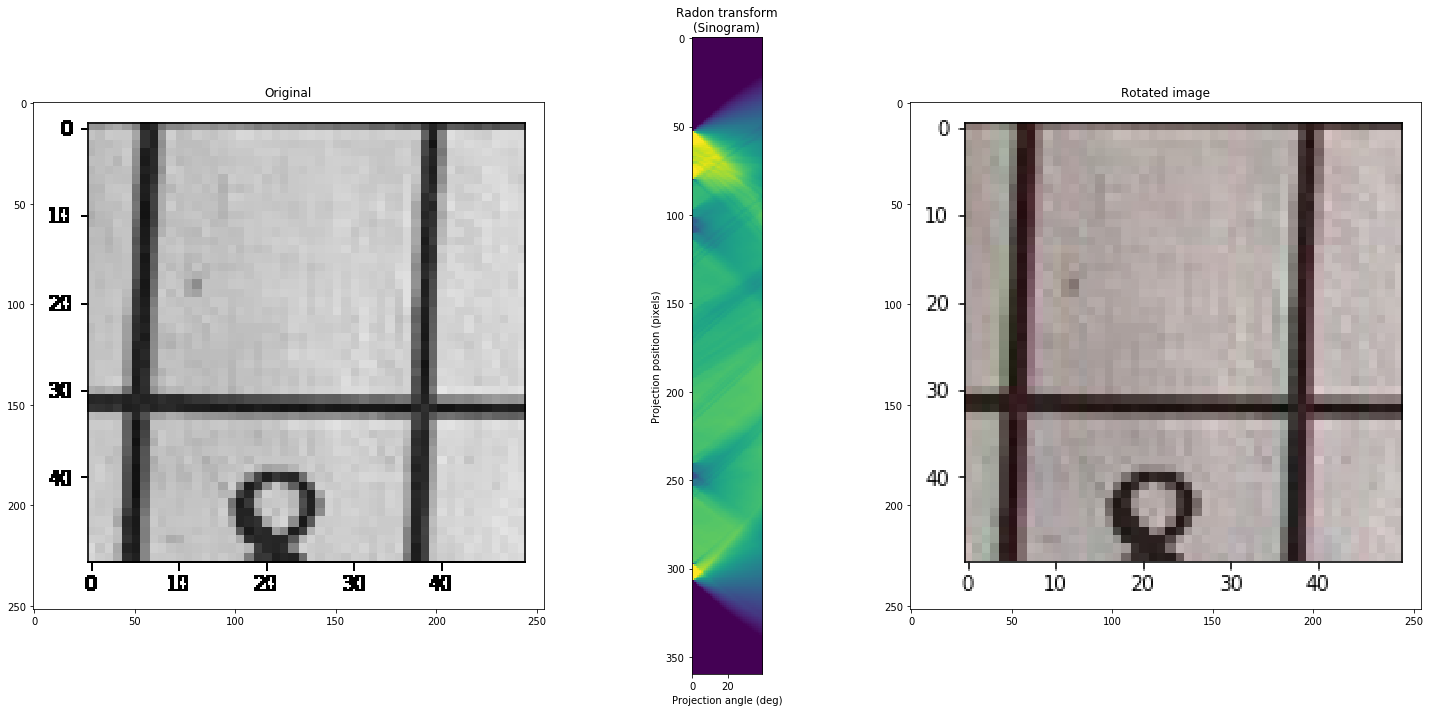

In [3]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 10))

ax1.set_title("Original")
ax1.imshow(image, cmap=plt.cm.Greys_r)

ax2.set_title("Radon transform\n(Sinogram)")
ax2.set_xlabel("Projection angle (deg)")
ax2.set_ylabel("Projection position (pixels)")
ax2.imshow(sinogram)

r = np.array([rms_flat(line) for line in sinogram.transpose()])

r = np.array([np.sqrt(np.mean(np.abs(line) ** 2)) for line in sinogram.transpose()])
rotation = np.argmax(r)
print('Rotation: {:.2f} degrees'.format(90 - rotation))

# rotation = argmax(r)
# print(theta[rotation])
# print('Rotation: {:.2f} degrees'.format(360-theta[rotation]))

ax3.set_title("Rotated image")
ax3.imshow(rotate(sample, 360-rotation, cval=1), cmap="gray")

fig.tight_layout()
plt.show()